### Importing libraries

In [1]:
import torch
import matplotlib
import seaborn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
torch.__version__

'1.4.0'

### Loading data

Source: https://www.kaggle.com/jemishdonda/headbrain

In [3]:
size_weight_data = pd.read_csv('datasets/headbrain.csv')

size_weight_data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [4]:
size_weight_data.shape

(237, 4)

In [5]:
size_weight_data.drop(['Gender', 'Age Range'], axis=1, inplace=True)

size_weight_data.columns

Index(['Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

### Renaming columns

In [6]:
size_weight_data = size_weight_data.rename(columns={'Head Size(cm^3)' : 'Head Size',
                                                    'Brain Weight(grams)' : 'Brain Weight'})

In [7]:
size_weight_data.head()

,Head Size,Brain Weight
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


### Visualizing dataset

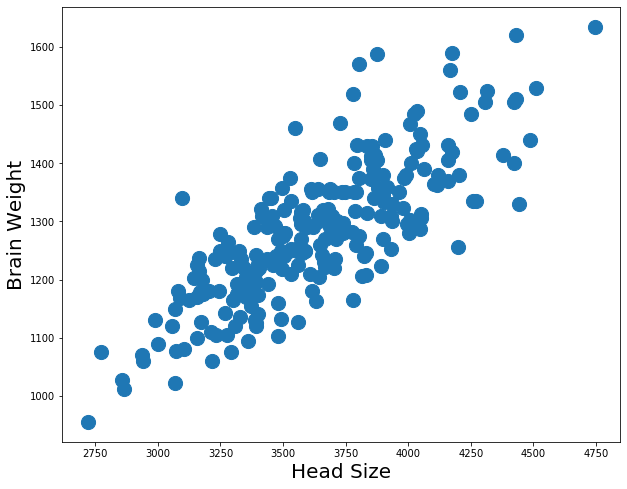

In [8]:
plt.figure(figsize=(10, 8))

plt.scatter(size_weight_data['Head Size'], size_weight_data['Brain Weight'], s=200)

plt.xlabel('Head Size', fontsize=20)
plt.ylabel('Brain Weight', fontsize=20)

plt.show()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(size_weight_data[['Head Size']], 
                                                    size_weight_data[['Brain Weight']],
                                                    test_size = 0.2, random_state = 1)

In [10]:
x_train.shape, y_train.shape

((189, 1), (189, 1))

In [11]:
x_test.shape, y_test.shape

((48, 1), (48, 1))

In [12]:
x_train.describe()

,Head Size
count,189.000000
mean,3622.841270
std,361.195262
min,2720.000000
25%,3381.000000
50%,3609.000000
75%,3858.000000
max,4747.000000


In [13]:
standardScaler_x = StandardScaler()

standardScaler_x.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
x_train = pd.DataFrame(standardScaler_x.transform(x_train))

x_train.describe()

,0
count,1.890000e+02
mean,-9.780536e-17
std,1.002656e+00
min,-2.506232e+00
25%,-6.713366e-01
50%,-3.842252e-02
75%,6.527863e-01
max,3.120596e+00


In [15]:
x_test = pd.DataFrame(standardScaler_x.transform(x_test))

x_test.describe()

,0
count,48.000000
mean,0.152828
std,1.059236
min,-2.106497
25%,-0.637331
50%,0.151729
75%,0.774234
max,2.273935


In [16]:
standardScaler_y = StandardScaler()

standardScaler_y.fit(y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
y_train = pd.DataFrame(standardScaler_y.transform(y_train))

y_train.describe()

,0
count,1.890000e+02
mean,7.988906e-16
std,1.002656e+00
min,-2.720822e+00
25%,-6.348438e-01
50%,-9.050276e-03
75%,5.750236e-01
max,2.953039e+00


In [18]:
y_test = pd.DataFrame(standardScaler_y.transform(y_test))

y_test.describe()

,0
count,48.000000
mean,0.073694
std,1.018302
min,-2.245219
25%,-0.568092
50%,-0.009050
75%,0.825341
max,2.577563


### Converting values into tensors

In [19]:
x_train_tensor = torch.tensor(x_train.values.reshape(-1, 1), dtype = torch.float)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype = torch.float)

x_test_tensor = torch.tensor(x_test.values.reshape(-1, 1), dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype = torch.float)

In [20]:
x_train_tensor.shape

torch.Size([189, 1])

In [21]:
y_train_tensor.shape

torch.Size([189, 1])

In [22]:
x_train_tensor[:5]

tensor([[ 2.4683],
        [-0.8323],
        [ 1.2052],
        [ 0.8138],
        [-0.9878]])

### Building model

In [78]:
input_layer = 1
hidden_layer = 12
output_layer = 1

https://pytorch.org/docs/stable/nn.html#mseloss

In [79]:
loss_func = torch.nn.MSELoss(reduction='sum')

### Regression using optimizers

In [80]:
model = torch.nn.Sequential(torch.nn.Linear(input_layer, hidden_layer),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hidden_layer, output_layer))

In [97]:
learning_rate = 1e-4

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# TODO recording: First run with 100 iterations, then with 2000 (don't rewrite the code, just come back to this
# cell and  change the values here and hit shift+enter on the remaining code cells)

for i in range(2000):
    
    y_pred = model(x_train_tensor)
    
    loss = loss_func(y_pred, y_train_tensor)
    print('Iteration no: %s and Loss: %s' %(i, loss.item()))
    
    model.zero_grad()
    loss.backward()
    
    optimizer.step()

Iteration no: 0 and Loss: 67.92976379394531
Iteration no: 1 and Loss: 67.91918182373047
Iteration no: 2 and Loss: 67.90863800048828
Iteration no: 3 and Loss: 67.89810180664062
Iteration no: 4 and Loss: 67.88761901855469
Iteration no: 5 and Loss: 67.87712097167969
Iteration no: 6 and Loss: 67.8666763305664
Iteration no: 7 and Loss: 67.85624694824219
Iteration no: 8 and Loss: 67.84586334228516
Iteration no: 9 and Loss: 67.83544921875
Iteration no: 10 and Loss: 67.8250961303711
Iteration no: 11 and Loss: 67.81473541259766
Iteration no: 12 and Loss: 67.8044204711914
Iteration no: 13 and Loss: 67.79411315917969
Iteration no: 14 and Loss: 67.78382110595703
Iteration no: 15 and Loss: 67.7735595703125
Iteration no: 16 and Loss: 67.7632827758789
Iteration no: 17 and Loss: 67.7530746459961
Iteration no: 18 and Loss: 67.74288940429688
Iteration no: 19 and Loss: 67.73269653320312
Iteration no: 20 and Loss: 67.7225112915039
Iteration no: 21 and Loss: 67.71234130859375
Iteration no: 22 and Loss: 67.

Iteration no: 260 and Loss: 65.86798858642578
Iteration no: 261 and Loss: 65.86202239990234
Iteration no: 262 and Loss: 65.85601806640625
Iteration no: 263 and Loss: 65.85005187988281
Iteration no: 264 and Loss: 65.8441390991211
Iteration no: 265 and Loss: 65.83820343017578
Iteration no: 266 and Loss: 65.83230590820312
Iteration no: 267 and Loss: 65.82640838623047
Iteration no: 268 and Loss: 65.82051849365234
Iteration no: 269 and Loss: 65.8147201538086
Iteration no: 270 and Loss: 65.80889129638672
Iteration no: 271 and Loss: 65.80314636230469
Iteration no: 272 and Loss: 65.79740142822266
Iteration no: 273 and Loss: 65.7916259765625
Iteration no: 274 and Loss: 65.78590393066406
Iteration no: 275 and Loss: 65.78020477294922
Iteration no: 276 and Loss: 65.77452087402344
Iteration no: 277 and Loss: 65.76881408691406
Iteration no: 278 and Loss: 65.76316833496094
Iteration no: 279 and Loss: 65.75751495361328
Iteration no: 280 and Loss: 65.75187683105469
Iteration no: 281 and Loss: 65.746238

Iteration no: 552 and Loss: 64.61922454833984
Iteration no: 553 and Loss: 64.61610412597656
Iteration no: 554 and Loss: 64.61299896240234
Iteration no: 555 and Loss: 64.60990142822266
Iteration no: 556 and Loss: 64.60680389404297
Iteration no: 557 and Loss: 64.60370635986328
Iteration no: 558 and Loss: 64.60059356689453
Iteration no: 559 and Loss: 64.5975570678711
Iteration no: 560 and Loss: 64.59455871582031
Iteration no: 561 and Loss: 64.5915756225586
Iteration no: 562 and Loss: 64.58859252929688
Iteration no: 563 and Loss: 64.58560180664062
Iteration no: 564 and Loss: 64.58265686035156
Iteration no: 565 and Loss: 64.5796890258789
Iteration no: 566 and Loss: 64.57675170898438
Iteration no: 567 and Loss: 64.57379913330078
Iteration no: 568 and Loss: 64.57089233398438
Iteration no: 569 and Loss: 64.56794738769531
Iteration no: 570 and Loss: 64.56505584716797
Iteration no: 571 and Loss: 64.5621337890625
Iteration no: 572 and Loss: 64.55923461914062
Iteration no: 573 and Loss: 64.5563430

Iteration no: 837 and Loss: 63.93586730957031
Iteration no: 838 and Loss: 63.93400573730469
Iteration no: 839 and Loss: 63.932132720947266
Iteration no: 840 and Loss: 63.930274963378906
Iteration no: 841 and Loss: 63.92842102050781
Iteration no: 842 and Loss: 63.926570892333984
Iteration no: 843 and Loss: 63.924720764160156
Iteration no: 844 and Loss: 63.92286682128906
Iteration no: 845 and Loss: 63.92104721069336
Iteration no: 846 and Loss: 63.91919708251953
Iteration no: 847 and Loss: 63.91738510131836
Iteration no: 848 and Loss: 63.915565490722656
Iteration no: 849 and Loss: 63.913726806640625
Iteration no: 850 and Loss: 63.91193389892578
Iteration no: 851 and Loss: 63.91012191772461
Iteration no: 852 and Loss: 63.90830612182617
Iteration no: 853 and Loss: 63.90650939941406
Iteration no: 854 and Loss: 63.90471267700195
Iteration no: 855 and Loss: 63.90290832519531
Iteration no: 856 and Loss: 63.90110397338867
Iteration no: 857 and Loss: 63.89933395385742
Iteration no: 858 and Loss: 

Iteration no: 1121 and Loss: 63.588069915771484
Iteration no: 1122 and Loss: 63.58693313598633
Iteration no: 1123 and Loss: 63.58578872680664
Iteration no: 1124 and Loss: 63.58463668823242
Iteration no: 1125 and Loss: 63.58349609375
Iteration no: 1126 and Loss: 63.58235549926758
Iteration no: 1127 and Loss: 63.58120346069336
Iteration no: 1128 and Loss: 63.58007049560547
Iteration no: 1129 and Loss: 63.578922271728516
Iteration no: 1130 and Loss: 63.57779312133789
Iteration no: 1131 and Loss: 63.57664489746094
Iteration no: 1132 and Loss: 63.57552719116211
Iteration no: 1133 and Loss: 63.57439041137695
Iteration no: 1134 and Loss: 63.573265075683594
Iteration no: 1135 and Loss: 63.57212829589844
Iteration no: 1136 and Loss: 63.571006774902344
Iteration no: 1137 and Loss: 63.56987762451172
Iteration no: 1138 and Loss: 63.56875991821289
Iteration no: 1139 and Loss: 63.567626953125
Iteration no: 1140 and Loss: 63.5665168762207
Iteration no: 1141 and Loss: 63.56539535522461
Iteration no: 1

Iteration no: 1342 and Loss: 63.3869743347168
Iteration no: 1343 and Loss: 63.386207580566406
Iteration no: 1344 and Loss: 63.385459899902344
Iteration no: 1345 and Loss: 63.384681701660156
Iteration no: 1346 and Loss: 63.3839225769043
Iteration no: 1347 and Loss: 63.38313293457031
Iteration no: 1348 and Loss: 63.38237762451172
Iteration no: 1349 and Loss: 63.38161849975586
Iteration no: 1350 and Loss: 63.380855560302734
Iteration no: 1351 and Loss: 63.380096435546875
Iteration no: 1352 and Loss: 63.37933349609375
Iteration no: 1353 and Loss: 63.378578186035156
Iteration no: 1354 and Loss: 63.3778190612793
Iteration no: 1355 and Loss: 63.377052307128906
Iteration no: 1356 and Loss: 63.37630081176758
Iteration no: 1357 and Loss: 63.37556076049805
Iteration no: 1358 and Loss: 63.37479019165039
Iteration no: 1359 and Loss: 63.37404251098633
Iteration no: 1360 and Loss: 63.3732795715332
Iteration no: 1361 and Loss: 63.37254333496094
Iteration no: 1362 and Loss: 63.371788024902344
Iteration

Iteration no: 1633 and Loss: 63.20956802368164
Iteration no: 1634 and Loss: 63.20905303955078
Iteration no: 1635 and Loss: 63.208560943603516
Iteration no: 1636 and Loss: 63.20805740356445
Iteration no: 1637 and Loss: 63.207557678222656
Iteration no: 1638 and Loss: 63.20703125
Iteration no: 1639 and Loss: 63.206539154052734
Iteration no: 1640 and Loss: 63.20600891113281
Iteration no: 1641 and Loss: 63.20549774169922
Iteration no: 1642 and Loss: 63.20500183105469
Iteration no: 1643 and Loss: 63.20450973510742
Iteration no: 1644 and Loss: 63.20396423339844
Iteration no: 1645 and Loss: 63.20344924926758
Iteration no: 1646 and Loss: 63.202938079833984
Iteration no: 1647 and Loss: 63.202430725097656
Iteration no: 1648 and Loss: 63.201927185058594
Iteration no: 1649 and Loss: 63.201416015625
Iteration no: 1650 and Loss: 63.20089340209961
Iteration no: 1651 and Loss: 63.20038604736328
Iteration no: 1652 and Loss: 63.19987106323242
Iteration no: 1653 and Loss: 63.19935607910156
Iteration no: 1

Iteration no: 1845 and Loss: 63.109432220458984
Iteration no: 1846 and Loss: 63.1090087890625
Iteration no: 1847 and Loss: 63.10857009887695
Iteration no: 1848 and Loss: 63.108154296875
Iteration no: 1849 and Loss: 63.10773468017578
Iteration no: 1850 and Loss: 63.10729217529297
Iteration no: 1851 and Loss: 63.106868743896484
Iteration no: 1852 and Loss: 63.106449127197266
Iteration no: 1853 and Loss: 63.10601806640625
Iteration no: 1854 and Loss: 63.105594635009766
Iteration no: 1855 and Loss: 63.10516357421875
Iteration no: 1856 and Loss: 63.104736328125
Iteration no: 1857 and Loss: 63.10431671142578
Iteration no: 1858 and Loss: 63.1038932800293
Iteration no: 1859 and Loss: 63.103485107421875
Iteration no: 1860 and Loss: 63.10304260253906
Iteration no: 1861 and Loss: 63.10262680053711
Iteration no: 1862 and Loss: 63.102203369140625
Iteration no: 1863 and Loss: 63.10178756713867
Iteration no: 1864 and Loss: 63.10136032104492
Iteration no: 1865 and Loss: 63.10094451904297
Iteration no:

In [102]:
model.eval()

with torch.no_grad():
    y_pred = model(x_test_tensor)

y_pred_tensor[:10]

tensor([[-0.9238],
        [ 0.1577],
        [-0.2078],
        [ 0.4265],
        [-0.0279],
        [ 1.1557],
        [ 0.5982],
        [ 0.7742],
        [ 0.0475],
        [-0.8778]], grad_fn=<SliceBackward>)

In [103]:
y_pred = y_pred_tensor.detach().numpy()

y_pred[:10]

array([[-0.9238179 ],
       [ 0.15765102],
       [-0.20782124],
       [ 0.42649943],
       [-0.02785116],
       [ 1.1557329 ],
       [ 0.5981958 ],
       [ 0.7741845 ],
       [ 0.04752433],
       [-0.87781227]], dtype=float32)

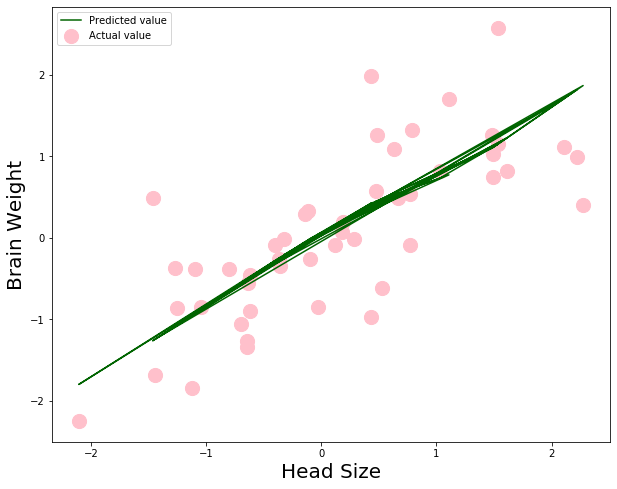

In [104]:
plt.figure(figsize=(10, 8))

plt.scatter(x_test, y_test, s=200, c='pink', label='Actual value')
plt.plot(x_test, y_pred, label='Predicted value', c='darkgreen')

plt.xlabel('Head Size', fontsize=20)
plt.ylabel('Brain Weight', fontsize=20)

plt.legend()

plt.show()

In [105]:
r2_score(y_test, y_pred)

0.5436508636862674